## Code to reproduce pictures from the article "The Divergent Intron-Containing Actin in Sponge Morphogenetic Processes"

In [1]:
##imports
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as lines
from matplotlib.pyplot import rc_context
import scanpy as sc
import seaborn as sns
import string

cm = 1/2.54

/home/vasiliy_zubarev/software/SAMap/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Make a single color palette for all plots in the notebook. Palette will contain 23 colors: 21 for cell clusters and 2 for unassigned cells and cells expressing multiple signatures.

In [ ]:
#import plotly.express as px
#import random
#from random import shuffle

#sample 21 colors from Turbo colormap
#n_colors = 21
#colors = list(px.colors.sample_colorscale("turbo", [n/(n_colors -1) for n in range(n_colors)]))

#converted=['blah']*n_colors
#for i in range(0,n_colors):
#  a=px.colors.unlabel_rgb(colors[i])
#  a=px.colors.unconvert_from_RGB_255(a)
#  converted[i]=a

#random.seed(100)
#shuffle(converted)
#converted

In [2]:
##Make a colormap of white for NA cells, grey for multi-signatures, and 21 colors from the result of the previous code.
colormap=[(1,1,1),
(0.5,0.5,0.5),
(0.27058823529411763, 0.47843137254901963, 0.9333333333333333),
(0.47843137254901963, 0.01568627450980392, 0.00784313725490196),
(0.8627450980392157, 0.23529411764705882, 0.027450980392156862),
(0.7568627450980392, 0.1450980392156863, 0.011764705882352941),
(0.6431372549019608, 0.9882352941176471, 0.23137254901960785),
(0.18823529411764706, 0.07058823529411765, 0.23137254901960785),
(0.2627450980392157, 0.34509803921568627, 0.7725490196078432),
(0.13725490196078433, 0.9137254901960784, 0.6705882352941176),
(0.4588235294117647, 0.9882352941176471, 0.36470588235294116),
(0.9725490196078431, 0.4980392156862745, 0.12941176470588237),
(0.9568627450980393, 0.7607843137254902, 0.2235294117647059),
(0.23529411764705882, 0.21176470588235294, 0.5372549019607843),
(0.9333333333333333, 0.35294117647058826, 0.07058823529411765),
(0.28627450980392155, 0.9647058823529412, 0.5137254901960784),
(0.11372549019607843, 0.8352941176470589, 0.796078431372549),
(0.7686274509803922, 0.9333333333333333, 0.21176470588235294),
(0.8745098039215686, 0.8549019607843137, 0.21176470588235294),
(0.16470588235294117, 0.7215686274509804, 0.9098039215686274),
(0.6274509803921569, 0.07450980392156863, 0.00392156862745098),
(0.9882352941176471, 0.6431372549019608, 0.18823529411764706),
(0.23529411764705882, 0.6, 0.9764705882352941)]

# Single-cell plate

In [3]:
HDuj_source = '/tank/projects/Zubarev_sponge/Analysis/2024_05_18_Seurat_clean/HDuj_reclustered_renumbered_20240522.h5ad'

bob=sc.read_h5ad(HDuj_source)

/home/vasiliy_zubarev/software/SAMap/lib/python3.9/site-packages/anndata/compat/__init__.py:311: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(


In [4]:
#bob.obs['scGate_multi_2']=bob.obs['scGate_multi'].replace('c', '.')
bob.obs['scGate_multi_2']=[sub.replace('uster', '.') for sub in bob.obs['scGate_multi']]
bob.obs

,orig.ident,nCount_RNA,nFeature_RNA,percent.mito,RNA_snn_res.0.25,seurat_clusters,pANN_0.25_0.13_644,DF.classifications_0.25_0.13_644,replicate,pANN_0.25_0.13_775,...,is.pure_cluster18,is.pure_cluster19,is.pure_cluster20,is.pure_cluster21,is.pure_cluster22,scGate_multi,is.pure_cluster15,nCount_RNA3,nFeature_RNA3,scGate_multi_2
AAACCCAAGAGCTTTC-bob_1,1,5067.0,2303,0.020722,0,0,0.268657,Singlet,bob1,NaN,...,1,1,1,1,1,cluster0,1,5067.0,2303,cl.0
AAACCCAAGATTAGAC-bob_1,1,1475.0,846,0.001356,0,0,0.027186,Singlet,bob1,NaN,...,1,1,1,1,1,cluster0,1,1475.0,846,cl.0
AAACCCAAGTTGGCTT-bob_1,1,3066.0,1508,0.003588,0,0,0.109275,Singlet,bob1,NaN,...,1,1,1,1,1,cluster0,1,3066.0,1508,cl.0
AAACCCACAGCCGGTT-bob_1,1,708.0,442,0.002825,0,0,0.017591,Singlet,bob1,NaN,...,1,1,1,1,1,NA,1,708.0,442,NA
AAACCCAGTAACATAG-bob_1,1,4470.0,2056,0.010291,2,2,0.208955,Singlet,bob1,NaN,...,1,1,1,1,1,cluster0,1,4470.0,2056,cl.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGCACAGACGA-bob_2,2,2208.0,1236,0.016304,0,0,NaN,NA,bob2,0.093333,...,1,1,1,1,1,cluster0,1,2208.0,1236,cl.0
TTTGTTGCAGCCATTA-bob_2,2,2315.0,1213,0.016847,0,0,NaN,NA,bob2,0.095054,...,1,1,1,1,1,cluster0,1,2315.0,1213,cl.0
TTTGTTGGTACCCACG-bob_2,2,2387.0,1056,0.005027,4,4,NaN,NA,bob2,0.152258,...,1,1,1,1,1,cluster4,1,2387.0,1056,cl.4
TTTGTTGTCGTTGTAG-bob_2,2,7549.0,2366,0.003444,9,9,NaN,NA,bob2,0.320000,...,1,1,1,1,1,cluster9,1,7549.0,2366,cl.9


/home/vasiliy_zubarev/software/SAMap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/vasiliy_zubarev/software/SAMap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/home/vasiliy_zubarev/software/SAMap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/home/vasiliy_zubarev/software/SAMap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Paramet

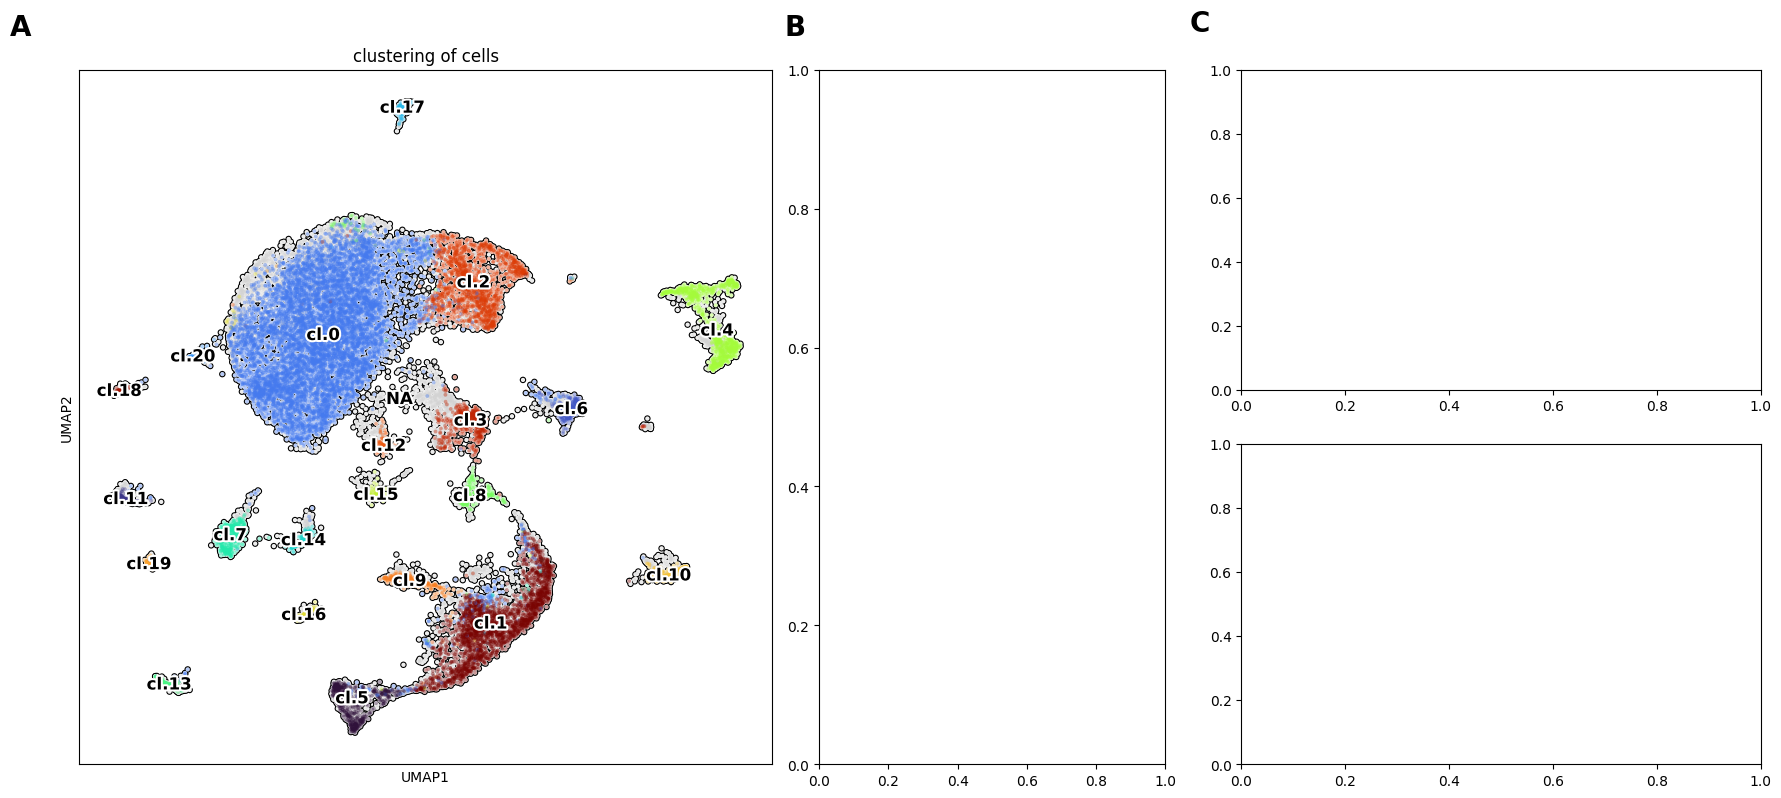

/home/vasiliy_zubarev/software/SAMap/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:169: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/vasiliy_zubarev/software/SAMap/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:179: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/vasiliy_zubarev/software/SAMap/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.sc

In [5]:
#figure & subplots
fig = plt.figure(layout="constrained", figsize=(45*cm, 20*cm))
x = [['A', 'B', 'C'],
     ['A', 'B', 'D']]
axd = fig.subplot_mosaic(x, width_ratios=[2,1,1.5])

#letters a-c on subplots
axd['A'].text(-0.1, 1.05, string.ascii_uppercase[0], transform=axd['A'].transAxes, size=20, weight='bold')
axd['B'].text(-0.1, 1.05, string.ascii_uppercase[1], transform=axd['B'].transAxes, size=20, weight='bold')
axd['C'].text(-0.1, 1.12, string.ascii_uppercase[2], transform=axd['C'].transAxes, size=20, weight='bold')


actins_dict = {
    "HdA1": ["nbis-gene-777"],
    "HdA2": ["nbis-gene-775"],
    "HdA3": ["nbis-gene-3785"],
    "HdA4": ["nbis-gene-3784"],
    "HdA5": ["nbis-gene-23114"],
    "HdA6": ["nbis-gene-25113"],
    "HdA7": ["nbis-gene-3783"]
}

#UMAP plot
groups=['cl.0', 'cl.1', 'cl.2', 'cl.3', 'cl.4', 'cl.5', 'cl.6', 'cl.7', 'cl.8',
        'cl.9','cl.10', 'cl.11', 'cl.12', 'cl.13','cl.14','cl.15','cl.16','cl.17',
       'cl.18','cl.19','cl.20']

sc.pl.umap(
        bob,
        color="scGate_multi_2",
        size=30,
        groups=groups,
        add_outline=True,
        legend_loc='on data',
        legend_fontsize=12,
        legend_fontoutline=3,
        frameon=True,
        title="clustering of cells",
        palette=colormap,
        alpha=0.4,
        ax=axd['A']
    )

#dotplot
b=sc.pl.dotplot(bob, actins_dict, "scGate_multi", dendrogram=False, show=False, cmap='YlGnBu', var_group_rotation=90, ax=axd['B'])
b['mainplot_ax'].set_xticklabels(["MT451954","MT451955","MT451956","MT451957","MT451958","MT451959","MT518195"])

#violin plots
c=sc.pl.violin(bob, keys="nbis-gene-3785", groupby='scGate_multi', ylabel="HdA3 expression level", rotation=90, ax=axd['C'], palette=colormap)
d=sc.pl.violin(bob, keys="nbis-gene-25113", groupby='scGate_multi', ylabel="HdA6 expression level", rotation=90, ax=axd['D'], palette=colormap)
axd['C'].set_xticklabels(['Multi','NA','cl.0', 'cl.1', 'cl.2', 'cl.3', 'cl.4', 'cl.5', 'cl.6', 'cl.7', 'cl.8',
                          'cl.9','cl.10', 'cl.11', 'cl.12', 'cl.13','cl.14','cl.15','cl.16','cl.17',
                          'cl.18','cl.19','cl.20'])
axd['D'].set_xticklabels(['Multi','NA','cl.0', 'cl.1', 'cl.2', 'cl.3', 'cl.4', 'cl.5', 'cl.6', 'cl.7', 'cl.8',
                          'cl.9','cl.10', 'cl.11', 'cl.12', 'cl.13','cl.14','cl.15','cl.16','cl.17',
                          'cl.18','cl.19','cl.20'])

#fig.show() may show figure without some subplots, but fig.canvas.print_figure() includes all.
fig.show()
fig.canvas.print_figure("/home/vasiliy_zubarev/sponge/figures/sc_plate_20250212.pdf", bbox_inches='tight')

# Cell type deconvolution plate

In [6]:
##### prepare dataframe of right shape #####
df = pd.read_csv("/tank/projects/Zubarev_sponge/Analysis/2024_05_18_Seurat_clean/Deconv_3k_marker_based_predicted_stage_fixed_season_random.tsv", sep="\t")

# Pivot the data for plotting
pivot_df = df.pivot_table(index='Code', columns='SC_Cluster', values='predicted3', aggfunc='sum').fillna(0)

# Define custom sorting orders
reaggregation_order = {'t': 1, 'c': 2, 'a': 3}
season_order = {'W': 1, 'P': 2, 'S': 3, 'A': 4}

# Sort the labels numerically
pivot_df = pivot_df.reindex(sorted(pivot_df.columns, key=lambda x: int(x[7:])), axis=1)
# Add sorting columns to pivot_df
pivot_df['ReaggregationOrder'] = pivot_df.index.map(lambda x: reaggregation_order[x.split('.')[1]])
pivot_df['SeasonOrder'] = pivot_df.index.map(lambda x: season_order[x.split('.')[0][-1]])
# Sort pivot_df with all three levels
pivot_df.sort_values(by=['ReaggregationOrder', 'SeasonOrder'], ascending=[False, False], inplace=True)
pivot_df.drop(columns=['SeasonOrder', 'ReaggregationOrder'], inplace=True)

#t stands for tissue, replace for b (body) since it's not entirely correct to use term "tissue" for sponges.
pivot_df["Code"]=[sub.replace('t', 'b') for sub in pivot_df.index]
pivot_df.index=[sub.replace('t', 'b') for sub in pivot_df.index]
pivot_df.tail()

SC_Cluster,cluster1,cluster0_2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8,cluster9,cluster10,cluster11,cluster12,cluster13,cluster14,cluster15,cluster16,cluster17,cluster18,Code
W.c,0.000000,0.611951,0.008894,0.002481,0.002921,0.023852,0.161354,0.032512,0.011618,0.017527,0.010036,0.020666,0.031555,0.000000,0.011280,0.005372,0.048032,0.001496,W.c
A.b,0.020495,0.584871,0.021099,0.009037,0.020377,0.032026,0.075764,0.072305,0.016605,0.028945,0.025346,0.054519,0.012628,0.002093,0.015099,0.005671,0.000000,0.003664,A.b
S.b,0.012632,0.510531,0.033857,0.021413,0.049973,0.023407,0.148157,0.000000,0.016911,0.027343,0.019086,0.101523,0.036786,0.002038,0.015139,0.007927,0.000000,0.004039,S.b
P.b,0.001307,0.487477,0.098661,0.026812,0.028197,0.014344,0.055007,0.071206,0.016628,0.043446,0.047664,0.037358,0.002487,0.004328,0.045512,0.003994,0.010943,0.004628,P.b
W.b,0.001307,0.513805,0.018802,0.006171,0.011101,0.032650,0.193497,0.017374,0.015899,0.032913,0.018983,0.042275,0.024861,0.001273,0.015609,0.008972,0.041353,0.003155,W.b


<Axes: >

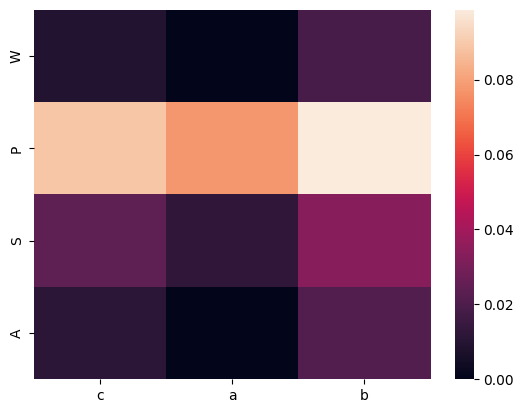

In [7]:
##### a function to plot a Season vs Stage abundancy heatmap for a single scRNA-seq cluster #####
def reaggr_heatmap_plotter(cluster_name, ax):
  tmpDF = pd.DataFrame(columns=["Season","Stage"])
  #tmpDF[["Season","Stage"]]=
  #pivot_df["Code"]=pivot_df.index
  tmpDF[["Season","Stage"]]=pivot_df["Code"].str.split('.', expand=True)
  tmpDF["predicted"]=pivot_df[cluster_name]
  tmpDF=tmpDF.pivot_table(index='Season', columns='Stage', values='predicted', aggfunc='sum').fillna(0)
  season_order = {'W': 1, 'P': 2, 'S': 3, 'A': 4}

  # Sort the labels numerically
  tmpDF['SeasonOrder'] = tmpDF.index.map(lambda x: season_order[x.split('.')[0][-1]])
  # Sort pivot_df with all three levels
  tmpDF.sort_values(by=['SeasonOrder'], ascending=[True], inplace=True)
  tmpDF.drop(columns=['SeasonOrder'], inplace=True)
  tmpDF = tmpDF.reindex(columns=["c", "a", "b"])

  hm=sns.heatmap(tmpDF, ax=ax)
  hm.set_xlabel('')
  hm.set_ylabel('')
  return(hm)
reaggr_heatmap_plotter('cluster3', ax=None)

<Axes: title={'center': 'Predicted Cell Type Abundancies'}, xlabel='Estimated Proportion'>

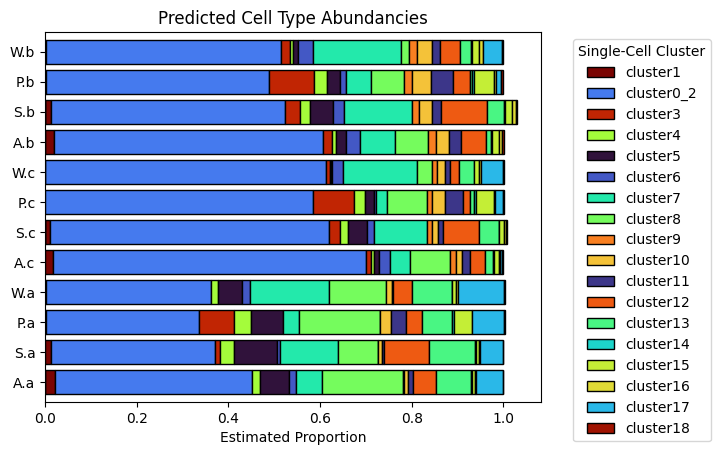

In [8]:
##### function to make a stacked barplot of cluster abundancies #####
colors=[colormap[3]]+[colormap[2]]+colormap[5:22]

def barplot_plotter(ax):
    # Stacking each cluster
    bp=pivot_df.plot(kind='barh', stacked=True, color=colors, ax=ax, width=0.8, edgecolor='black')
 # Customize the plot
    bp.set_xlabel('Estimated Proportion')
    #bp.set_ylabel('Factor combination')
    bp.set_ylabel('')
    bp.set_title('Predicted Cell Type Abundancies')
    bp.legend(title='Single-Cell Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
    return bp
barplot_plotter(ax=None)

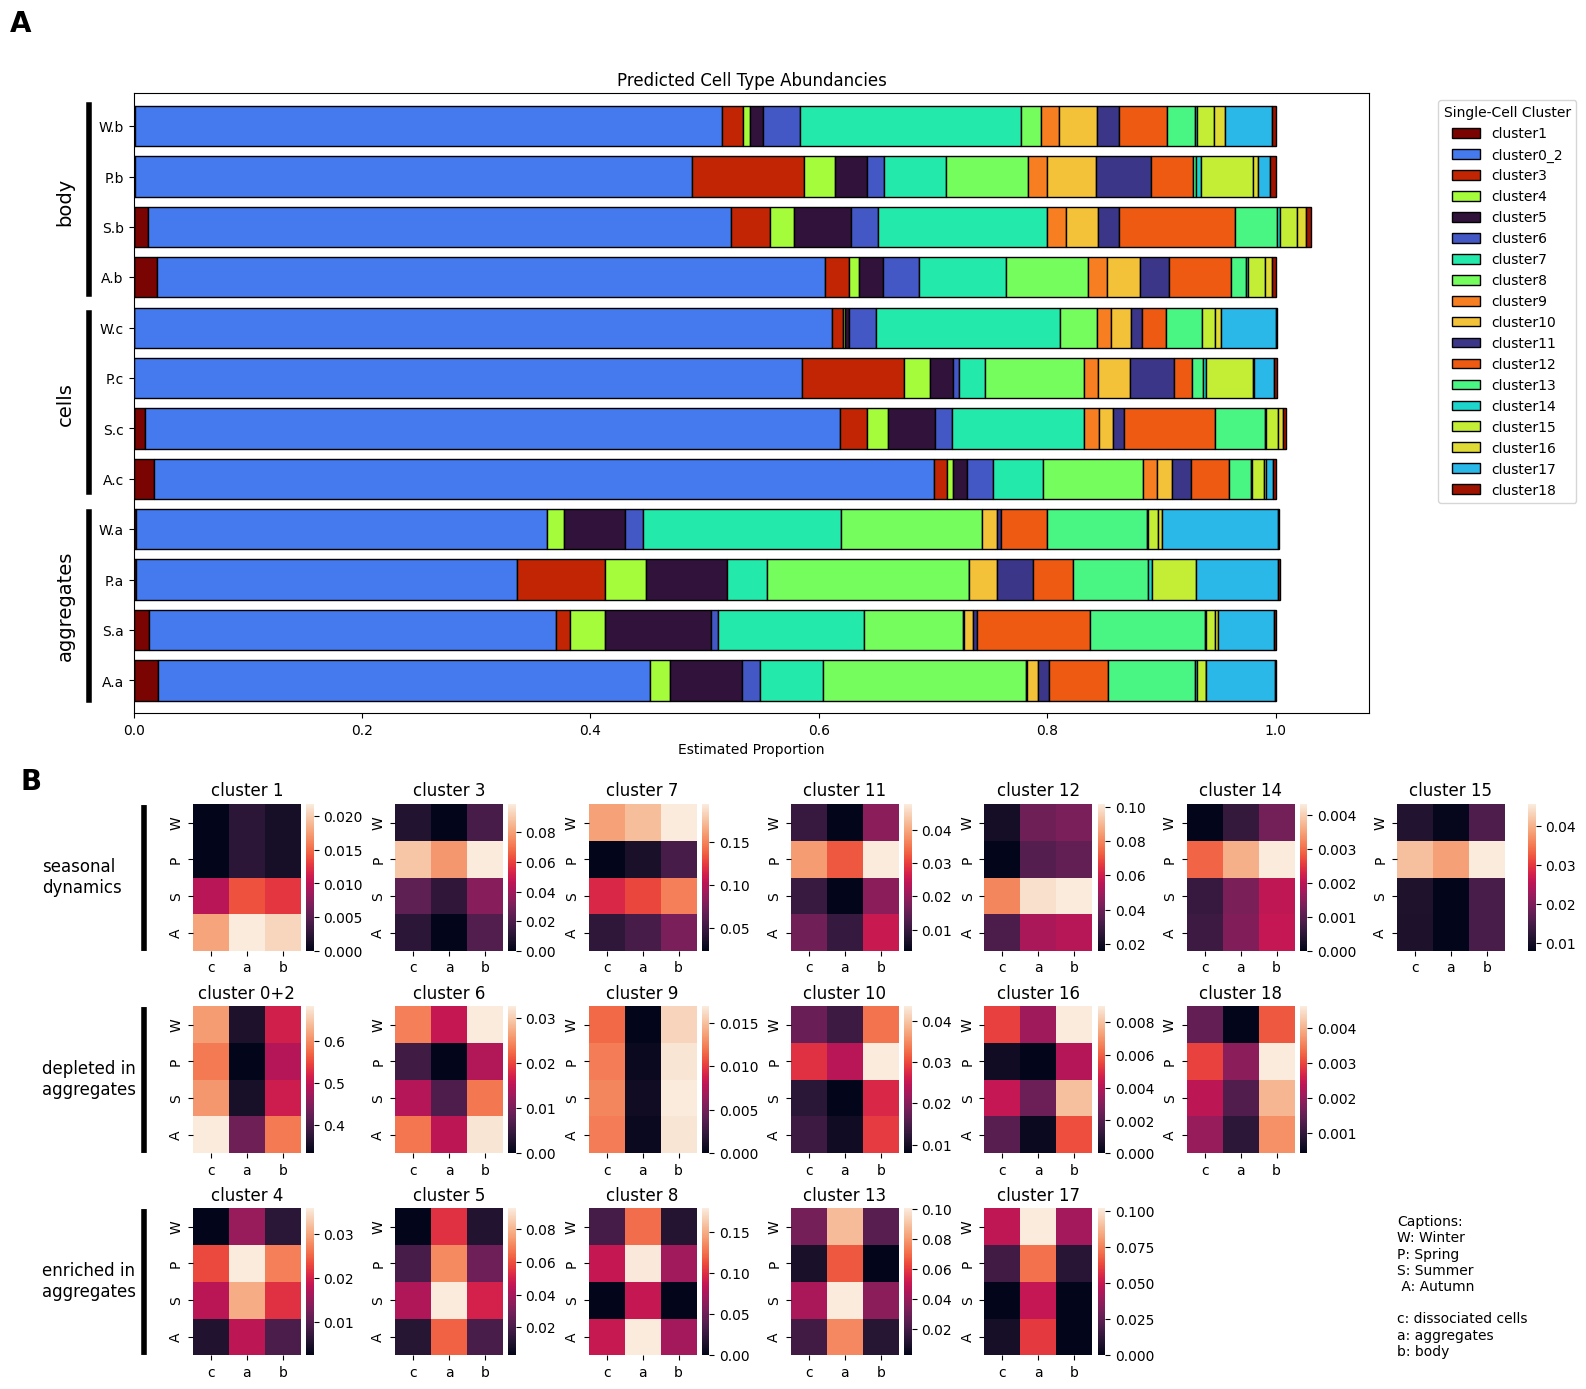

In [9]:
##### finally make figure #####

#figure & subplots
fig = plt.figure(layout="constrained", figsize=(40*cm, 35*cm))
bottom = [['blank1', 'A', 'B', 'C', 'D', 'E', 'F', 'G'],
     ['blank2', 'H', 'I', 'J', 'K', 'L', 'M', '.'],
     ['blank3', 'N', 'O', 'P', 'Q', 'R', '.', 'blank4']]
layout = [['top'],
         [bottom]]
axd = fig.subplot_mosaic(layout)

#letters (a-b) on subplots
axd['top'].text(-0.1, 1.1, string.ascii_uppercase[0], transform=axd['top'].transAxes, size=20, weight='bold')
axd['blank1'].text(-0.2, 1.1, string.ascii_uppercase[1], transform=axd['blank1'].transAxes, size=20, weight='bold')

#make barplot on the top and annotate it with text and lines
barplot_plotter(axd['top'])
line = lines.Line2D([-0.1 * cm, -0.1 * cm], 
                    [-1 * cm, 8.5 * cm], 
                    lw = 4, color ='black', 
                    axes = axd['top']) 
line.set_clip_on(False) 
axd['top'].add_line(line)

line = lines.Line2D([-0.1 * cm, -0.1 * cm], 
                    [9.5 * cm, 18.5 * cm], 
                    lw = 4, color ='black', 
                    axes = axd['top']) 
line.set_clip_on(False) 
axd['top'].add_line(line)

line = lines.Line2D([-0.1 * cm, -0.1 * cm], 
                    [19.5 * cm, 29 * cm], 
                    lw = 4, color ='black', 
                    axes = axd['top']) 
line.set_clip_on(False) 
axd['top'].add_line(line)
axd['top'].text(-0.06, 1.5,"aggregates",size=14, rotation=90,horizontalalignment='center', verticalalignment='center',rotation_mode='default')
axd['top'].text(-0.06, 5.5,"cells",size=14, rotation=90,horizontalalignment='center', verticalalignment='center',rotation_mode='default')
axd['top'].text(-0.06, 9.5,"body",size=14, rotation=90,horizontalalignment='center', verticalalignment='center',rotation_mode='default')

#populate bottom subfigure with heatmaps.
##1st row, seasonal pattern: clusters 1, 3, 7, 11, 12, 14, 15
##2nd row, down in cell aggregates: clusters 0+2, 6, 9, 10, 16, 18
##3rd row: up in cell aggregates: clusters 4, 5, 8, 13, 17 

axd['A'].set_title('cluster 1')
reaggr_heatmap_plotter('cluster1', ax=axd['A'])
axd['B'].set_title('cluster 3')
reaggr_heatmap_plotter('cluster3', ax=axd['B'])
axd['C'].set_title('cluster 7')
reaggr_heatmap_plotter('cluster7', ax=axd['C'])
axd['D'].set_title('cluster 11')
reaggr_heatmap_plotter('cluster11', ax=axd['D'])
axd['E'].set_title('cluster 12')
reaggr_heatmap_plotter('cluster12', ax=axd['E'])
axd['F'].set_title('cluster 14')
reaggr_heatmap_plotter('cluster14', ax=axd['F'])
axd['G'].set_title('cluster 15')
reaggr_heatmap_plotter('cluster15', ax=axd['G'])

axd['H'].set_title('cluster 0+2')
reaggr_heatmap_plotter('cluster0_2', ax=axd['H'])
axd['I'].set_title('cluster 6')
reaggr_heatmap_plotter('cluster6', ax=axd['I'])
axd['J'].set_title('cluster 9')
reaggr_heatmap_plotter('cluster9', ax=axd['J'])
axd['K'].set_title('cluster 10')
reaggr_heatmap_plotter('cluster10', ax=axd['K'])
axd['L'].set_title('cluster 16')
reaggr_heatmap_plotter('cluster16', ax=axd['L'])
axd['M'].set_title('cluster 18')
reaggr_heatmap_plotter('cluster18', ax=axd['M'])

axd['N'].set_title('cluster 4')
reaggr_heatmap_plotter('cluster4', ax=axd['N'])
axd['O'].set_title('cluster 5')
reaggr_heatmap_plotter('cluster5', ax=axd['O'])
axd['P'].set_title('cluster 8')
reaggr_heatmap_plotter('cluster8', ax=axd['P'])
axd['Q'].set_title('cluster 13')
reaggr_heatmap_plotter('cluster13', ax=axd['Q'])
axd['R'].set_title('cluster 17')
reaggr_heatmap_plotter('cluster17', ax=axd['R'])

#annotation of sibfigure b
axd['blank1'].text(0, 0.4, 'seasonal\ndynamics', size=12)
axd['blank2'].text(0, 0.4, 'depleted in \naggregates', size=12)
axd['blank3'].text(0, 0.4, 'enriched in \naggregates', size=12)
axd['blank1'].axvline(ymin=0, ymax=1, x=0.95, color='black', lw=4)
axd['blank2'].axvline(ymin=0, ymax=1, x=0.95, color='black', lw=4)
axd['blank3'].axvline(ymin=0, ymax=1, x=0.95, color='black', lw=4)
axd['blank4'].text(0, 0, 'Captions:\nW: Winter\nP: Spring\nS: Summer\n A: Autumn\n\nc: dissociated cells\na: aggregates\nb: body ', size=10)

#make invisible those axes that were used for text/line annotation and left blank
for blank in ['blank1', 'blank2', 'blank3', 'blank4']:
    axd[blank].xaxis.label.set_color('white')
    axd[blank].tick_params(axis='x', colors='white')
    axd[blank].yaxis.label.set_color('white')
    axd[blank].tick_params(axis='y', colors='white')
    axd[blank].spines['bottom'].set_color('white')
    axd[blank].spines['top'].set_color('white')
    axd[blank].spines['left'].set_color('white')
    axd[blank].spines['right'].set_color('white')

fig.show()
fig.canvas.print_figure("/home/vasiliy_zubarev/sponge/figures/deconvolution_plate_20250212.pdf", bbox_inches='tight')

# Cell type markers - supplementary figure

/home/vasiliy_zubarev/software/SAMap/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:169: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/vasiliy_zubarev/software/SAMap/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:179: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/vasiliy_zubarev/software/SAMap/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.sc

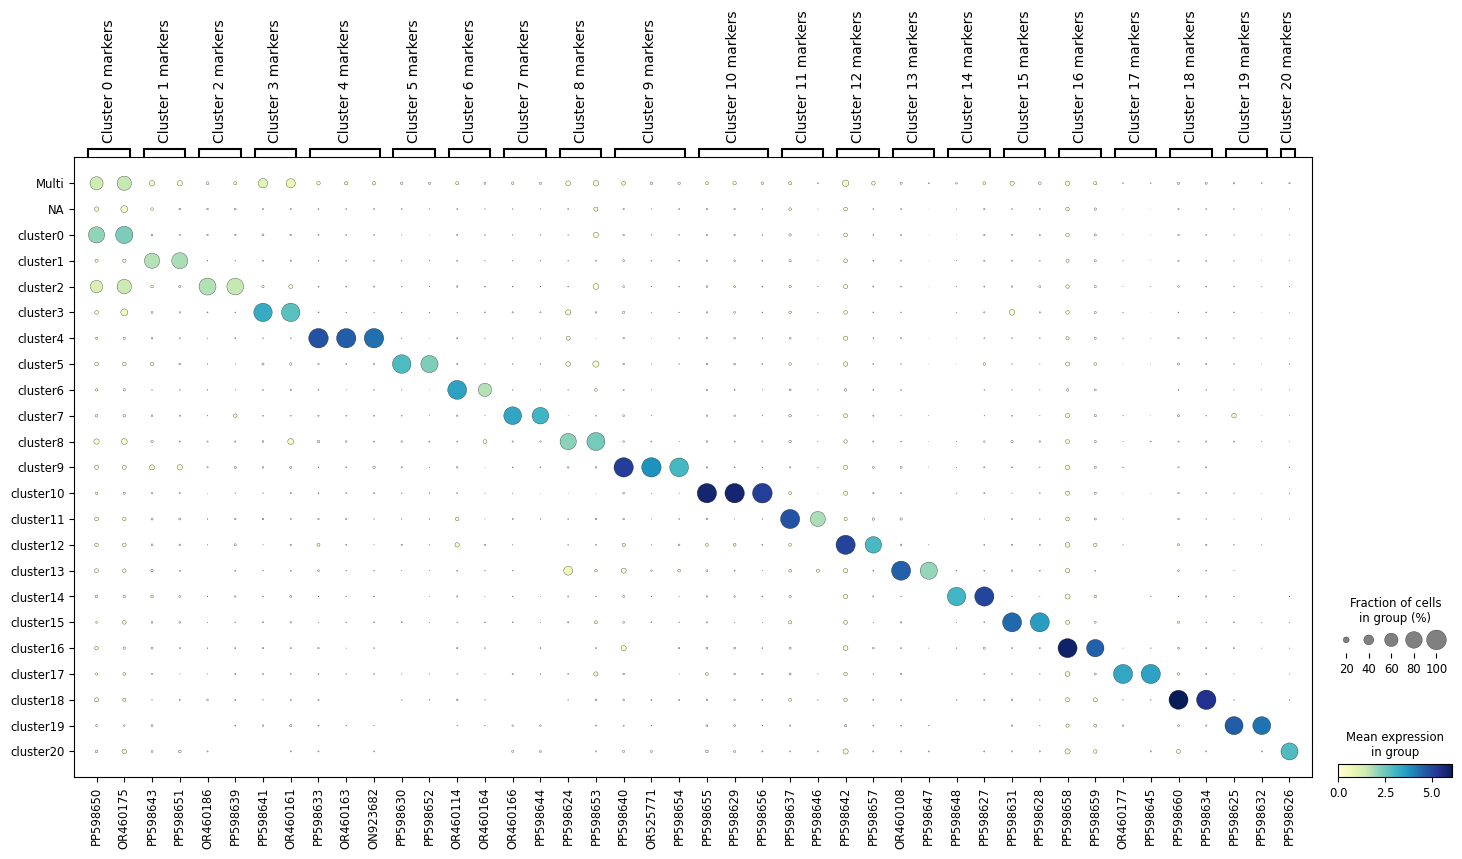

In [11]:
marker_dict={
    "Cluster 0 markers": ["nbis-gene-14338", "nbis-gene-2643"],
    "Cluster 1 markers": ["nbis-gene-3245", "nbis-gene-7566"],
    "Cluster 2 markers": ["nbis-gene-4339", "nbis-gene-12146"],
    "Cluster 3 markers": ["nbis-gene-12457", "nbis-gene-5418"],
    "Cluster 4 markers": ["nbis-gene-2548", "nbis-gene-3067", "nbis-gene-27301"],
    "Cluster 5 markers": ["nbis-gene-9784", "nbis-gene-26036"],
    "Cluster 6 markers": ["nbis-gene-4492", "nbis-gene-20686"],
    "Cluster 7 markers": ["nbis-gene-10124", "nbis-gene-10142"],
    "Cluster 8 markers": ["nbis-gene-125", "nbis-gene-12389"],
    "Cluster 9 markers": ["nbis-gene-5002", "nbis-gene-6478", "nbis-gene-2309"],
    "Cluster 10 markers": ["nbis-gene-9214", "nbis-gene-9213", "nbis-gene-9210"],
    "Cluster 11 markers": ["nbis-gene-5806", "nbis-gene-1749"],
    "Cluster 12 markers": ["nbis-gene-1890", "nbis-gene-3273"],
    "Cluster 13 markers": ["nbis-gene-12799", "nbis-gene-13877"],
    "Cluster 14 markers": ["nbis-gene-24995", "nbis-gene-7451"],
    "Cluster 15 markers": ["nbis-gene-20174", "nbis-gene-11670"],
    "Cluster 16 markers": ["nbis-gene-2826", "nbis-gene-2824"],
    "Cluster 17 markers": ["nbis-gene-8546", "nbis-gene-8580"],
    "Cluster 18 markers": ["nbis-gene-20493", "nbis-gene-4284"],
    "Cluster 19 markers": ["nbis-gene-10143", "nbis-gene-10144"],
    "Cluster 20 markers": ["nbis-gene-3963"]
}

marker_caption=[
    "PP598650",
    "OR460175",
    "PP598643",
    "PP598651",
    "OR460186",
    "PP598639",
    "PP598641",
    "OR460161",
    "PP598633",
    "OR460163",
    "ON923682",
    "PP598630",
    "PP598652",
    "OR460114",
    "OR460164",
    "OR460166",
    "PP598644",
    "PP598624",
    "PP598653",
    "PP598640",
    "OR525771",
    "PP598654",
    "PP598655",
    "PP598629",
    "PP598656",
    "PP598637",
    "PP598646",
    "PP598642",
    "PP598657",
    "OR460108",
    "PP598647",
    "PP598648",
    "PP598627",
    "PP598631",
    "PP598628",
    "PP598658",
    "PP598659",
    "OR460177",
    "PP598645",
    "PP598660",
    "PP598634",
    "PP598625",
    "PP598632",
    "PP598626",
]

marker_dp=sc.pl.dotplot(bob, marker_dict, "scGate_multi", dendrogram=False, cmap='YlGnBu', show=False)

marker_dp["mainplot_ax"].set_xticklabels(marker_caption)
fig=marker_dp["mainplot_ax"].get_figure()
fig.savefig("/home/vasiliy_zubarev/sponge/figures/markers_supplement_20250212.pdf", bbox_inches="tight")